In [24]:
#https://www.tensorflow.org/tutorials/images/classification

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [48]:
batch_size = 32
img_height = 256
img_width = 256

In [49]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "classifier_train/",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 300 files belonging to 1 classes.
Using 240 files for training.


In [50]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "classifier_train/",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 300 files belonging to 1 classes.
Using 60 files for validation.


In [51]:
class_names = train_ds.class_names
print(class_names)

['monet_jpg']


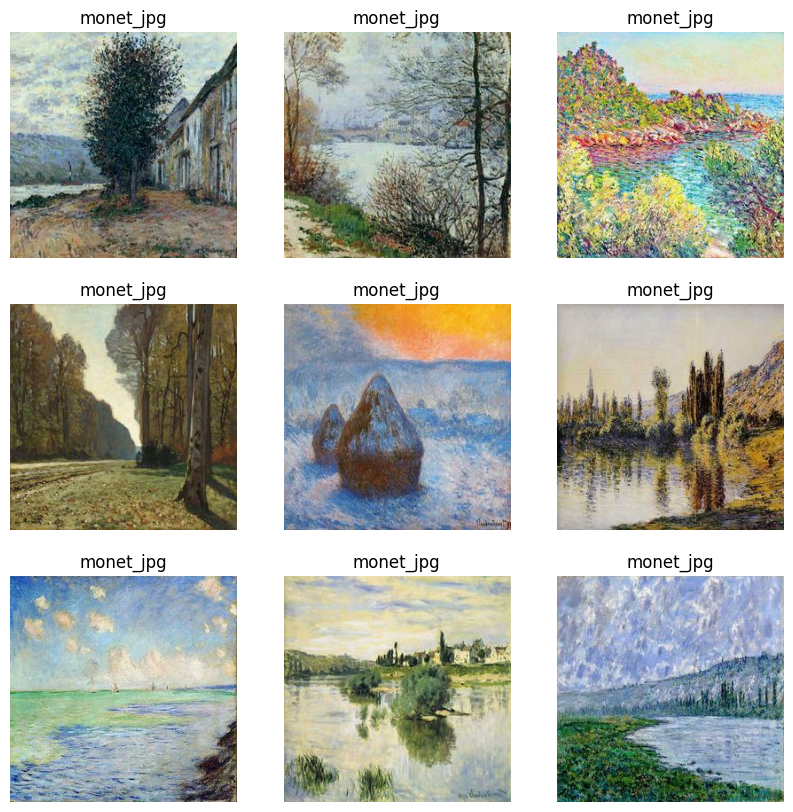

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [31]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [32]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [33]:
normalization_layer = layers.Rescaling(1./255)

In [34]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [35]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)       

In [39]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
184/184 [==============================] - 145s 781ms/step - loss: 0.1822 - accuracy: 0.9544 - val_loss: 0.1317 - val_accuracy: 0.9591
Epoch 2/10
184/184 [==============================] - 134s 729ms/step - loss: 0.1345 - accuracy: 0.9591 - val_loss: 0.1403 - val_accuracy: 0.9591
Epoch 3/10
184/184 [==============================] - 131s 713ms/step - loss: 0.1186 - accuracy: 0.9590 - val_loss: 0.1129 - val_accuracy: 0.9591
Epoch 4/10
184/184 [==============================] - 137s 743ms/step - loss: 0.1002 - accuracy: 0.9601 - val_loss: 0.1144 - val_accuracy: 0.9598
Epoch 5/10
 26/184 [===>..........................] - ETA: 1:49 - loss: 0.0775 - accuracy: 0.9627

KeyboardInterrupt: 

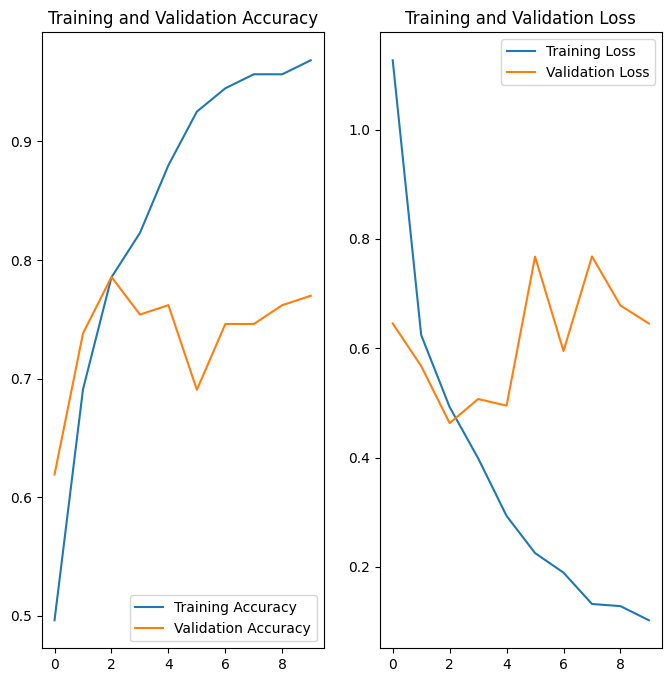

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
with tf.device('/cpu:0'):
  data_augmentation = keras.Sequential(
    [
      layers.RandomFlip("horizontal",
                        input_shape=(img_height,
                                    img_width,
                                    3)),
      layers.RandomRotation(0.1),
      layers.RandomZoom(0.1),
    ]
  )

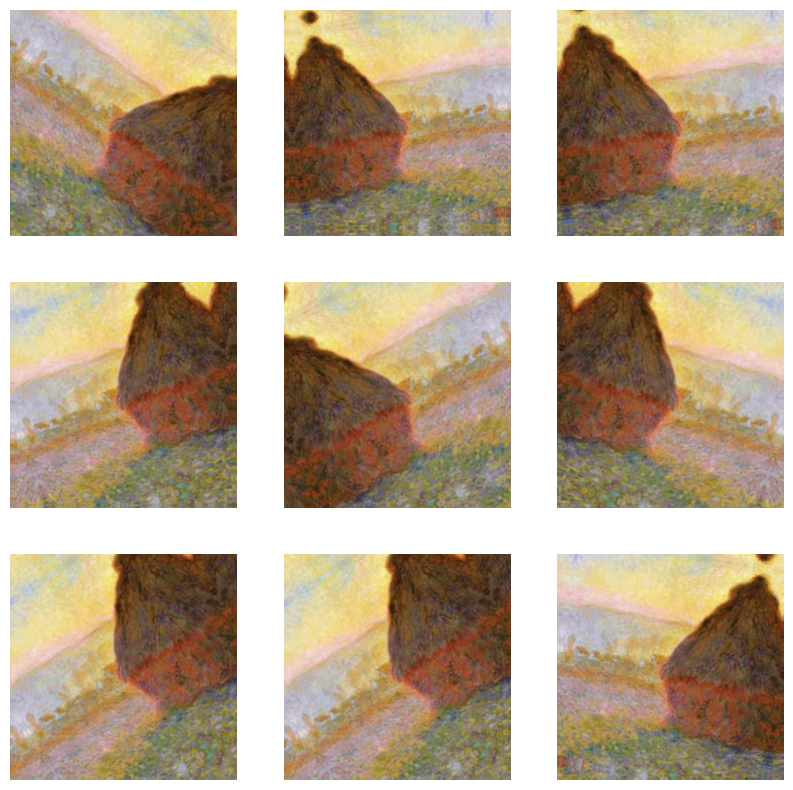

In [ ]:
with tf.device('/cpu:0'):
    plt.figure(figsize=(10, 10))
    for images, _ in train_ds.take(1):
        for i in range(9):
            augmented_images = data_augmentation(images)
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(augmented_images[0].numpy().astype("uint8"))
            plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                 

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


2022-12-05 14:41:56.330067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - ETA: 0s - loss: 1.3025 - accuracy: 0.4783

2022-12-05 14:41:58.236691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 120ms/step - loss: 1.3025 - accuracy: 0.4783 - val_loss: 0.6595 - val_accuracy: 0.5794
Epoch 2/15
16/16 [==============================] - 2s 97ms/step - loss: 0.6749 - accuracy: 0.5886 - val_loss: 0.5849 - val_accuracy: 0.6905
Epoch 3/15
16/16 [==============================] - 2s 97ms/step - loss: 0.6050 - accuracy: 0.7047 - val_loss: 0.5482 - val_accuracy: 0.6825
Epoch 4/15
16/16 [==============================] - 2s 101ms/step - loss: 0.5556 - accuracy: 0.7343 - val_loss: 0.6317 - val_accuracy: 0.6111
Epoch 5/15
16/16 [==============================] - 2s 96ms/step - loss: 0.5434 - accuracy: 0.7165 - val_loss: 0.5142 - val_accuracy: 0.6984
Epoch 6/15
16/16 [==============================] - 2s 96ms/step - loss: 0.5077 - accuracy: 0.7461 - val_loss: 0.5188 - val_accuracy: 0.7302
Epoch 7/15
16/16 [==============================] - 2s 95ms/step - loss: 0.4557 - accuracy: 0.7795 - val_loss: 0.5130 - val_accuracy: 0.7143
Epoch 8/15
16/16 [====

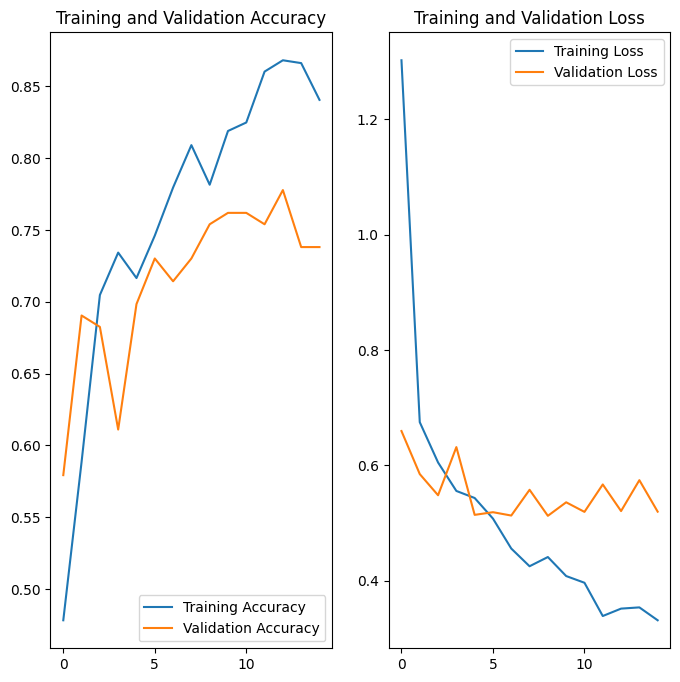

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save("classification_model.h5")

In [ ]:
img_array = tf.keras.utils.image_dataset_from_directory(
  "images2")

Found 7038 files belonging to 1 classes.


In [ ]:
predicted_labels.count(0) / (len(predictions))

0.17306052855924978

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def get_predictions(file_path):
    img_array = tf.keras.utils.image_dataset_from_directory(
                file_path)
    predictions = model.predict(img_array)
    predicted_labels = []
    for prediction in predictions:
        predicted_labels.append(np.argmax(prediction))
    return predicted_labels
    

In [ ]:
test_images = get_predictions("test_images")

Found 7038 files belonging to 1 classes.


In [ ]:
photo = get_predictions("images2")

Found 7038 files belonging to 1 classes.


In [ ]:
labels_monet = [0] * 7038
labels_photo = [1] * 7038

In [ ]:
actual = labels_monet + labels_photo
predicted = test_images + photo

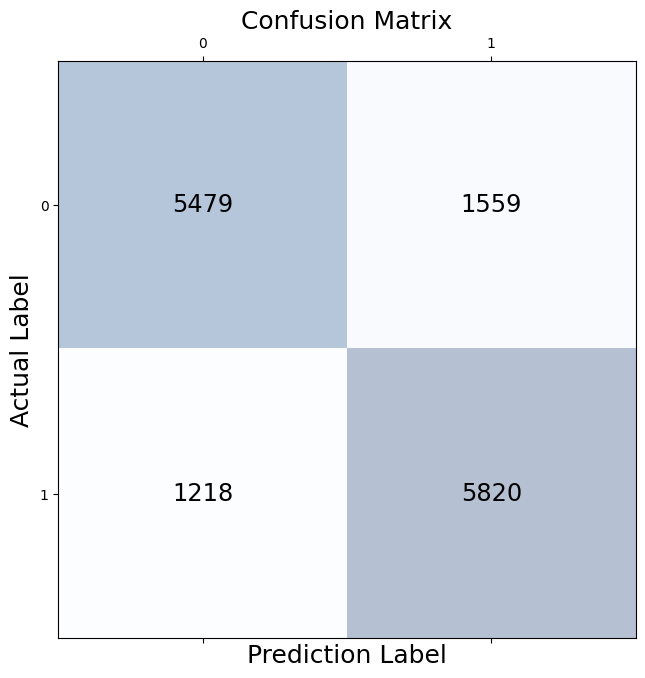

In [ ]:
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=actual, y_pred=predicted)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Prediction Label', fontsize=18)
plt.ylabel('Actual Label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()